# Identifying sentences that convey meaningful semantic relation between entities within the sentence - Error analysis (Analysis of 50 samples)

The goal of this notebook is to analyze the prediction outcomes for 50 randomly chosen samples from the test set.
- **Dataset used:** data500. 
- **Selected samples:** the first 50 samples from the test set.

To compare and evaluate the different approaches, we will focus on the following outcomes of the models that achieved the best validation accuracy:

- **Model 1:** Using predictions from experiment 63 (The classification was performed using a PMI score with a neural network having dimensions of [256 128 64] neurons, a learning rate of 0.001, and a batch size of 64).
- **Entity Count heuristic:** Using predictions from experiment 298 (where sentences with 10 or fewer entities were labeled as True, and False otherwise).
- **Mask Distance Heuristic:**  Using predictions from experiment 343 (where sentences with a distance of up to 2 tokens between the masked entities were labeled as True, and False otherwise).
- **Random Score heuristic:** Using predictions from experiment 574 (Where True and False were assigned randomly).

We will compare these predictions against two types of desired target labels:

- **PMI target label:** In this context, artificial labeling of pairs occurs, with a value of 1 assigned to pairs exceeding the median PMI score of the dataset.
- **Human-labeled target label:** This refers to labels I personally assigned to pairs of items based on manual assessment.

In [1]:
import pandas as pd
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [3]:
file_path = 'results.csv'

df = pd.read_csv(file_path, index_col=0)
df.head()

,Human taget label,PMI target label,Model1-63,EntityCount-298,MaskDistance-343,RandomScore-574
149767,1,1,0.282758,0.017544,0.063063,1
18428,0,0,0.716837,0.052632,0.072072,0
839724,0,1,0.579796,0.000000,0.045045,0
274601,0,0,0.526484,0.087719,0.180180,0
2112143,0,0,0.352927,0.105263,0.198198,0


In [4]:
def plot_ROC(df, target_column, score_columns):
    plt.figure(figsize=(10, 6))

    true_labels = df[target_column]

    for score_column in score_columns:
        fpr, tpr, _ = roc_curve(true_labels, df[score_column])        
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{score_column} (AUC = {roc_auc:.2f})')

    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()


### ROC and AUC according to PMI target labels

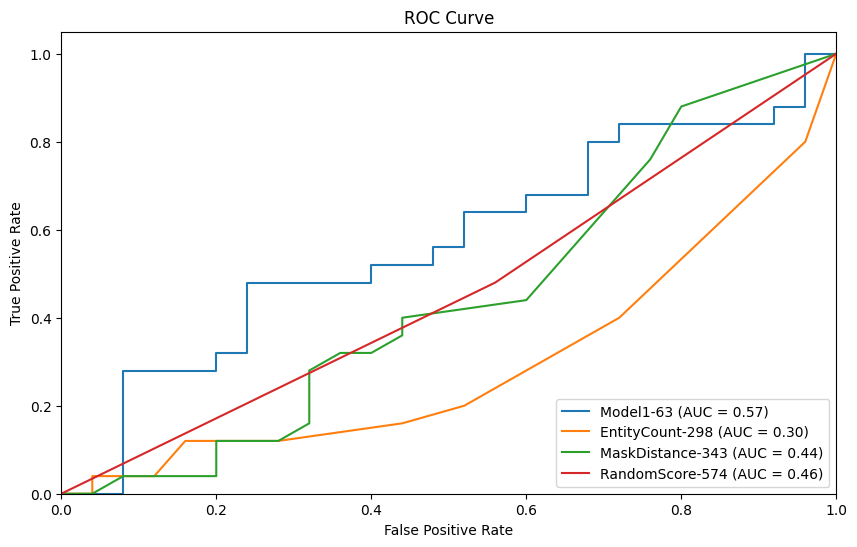

In [6]:
plot_ROC(df, target_column = 'PMI target label', score_columns = ['Model1-63', 'EntityCount-298', 'MaskDistance-343', 'RandomScore-574'])

### ROC and AUC according to Human-labeled target label

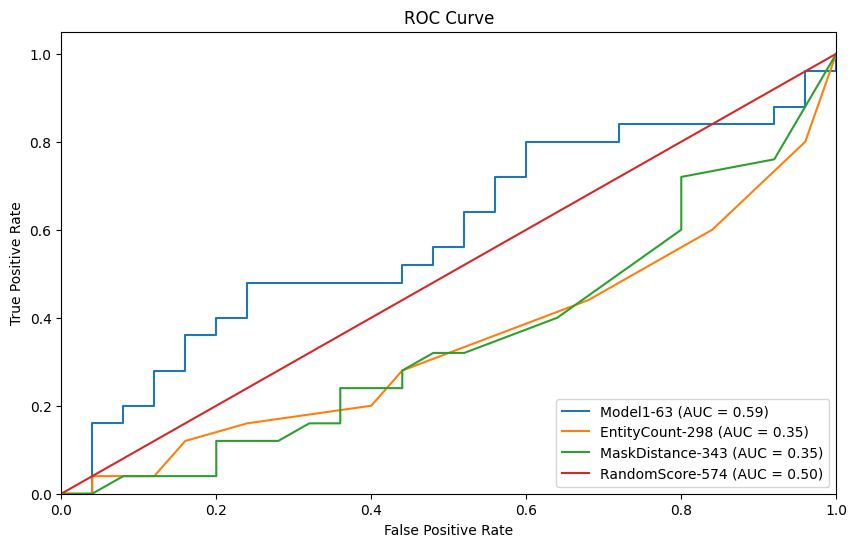

In [7]:
plot_ROC(df, target_column = 'Human taget label', score_columns = ['Model1-63', 'EntityCount-298', 'MaskDistance-343', 'RandomScore-574'])

## Conclusion

In both situations, it's clear that Model 1 does better than all other models.